# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [51]:
#  1. Get the total rides for each city type
grp_by_ride = pyber_data_df.groupby(['type'])
grp_by_ride['ride_id'].count()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [52]:
# 2. Get the total drivers for each city type
grp_by_driver = pyber_data_df.groupby(['type'])
grp_by_driver['driver_count'].sum()

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [53]:
#  3. Get the total amount of fares for each city type
grp_by_fare = pyber_data_df.groupby(['type'])
grp_by_fare['fare'].sum()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [54]:
#  4. Get the average fare per ride for each city type. 
grp_by_fare['fare'].sum() / grp_by_ride['ride_id'].count()

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [55]:
# 5. Get the average fare per driver for each city type. 
grp_by_fare['fare'].sum() / grp_by_driver['driver_count'].sum()

type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64

In [78]:
#  6. Create a PyBer summary DataFrame. 
summary_df = { 'Total Rides' : grp_by_ride['ride_id'].count(),
               'Total Drivers' : grp_by_driver['driver_count'].sum(),
               'Total Fares' : grp_by_fare['fare'].sum().to_numpy(),
               'Average Fare per Ride' : (grp_by_fare['fare'].sum() / grp_by_ride['ride_id'].count()),
               'Average Fare per Driver' : (grp_by_fare['fare'].sum() / grp_by_driver['driver_count'].sum()),
}
pyber_summary_df = pd.DataFrame.from_dict(summary_df)


In [79]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,4327.93,34.623440,8.059460
Suburban,625,8570,19356.33,30.970128,2.258615
Urban,1625,59602,39854.38,24.525772,0.668675


In [80]:
#  8. Format the columns.

pyber_summary_df['Total Rides'] = pyber_summary_df['Total Rides'].map("{:,}".format)
pyber_summary_df['Total Drivers'] = pyber_summary_df['Total Drivers'].map("{:,}".format)
pyber_summary_df['Total Fares'] = pyber_summary_df['Total Fares'].map("${:.2f}".format)
pyber_summary_df['Average Fare per Ride'] = pyber_summary_df['Average Fare per Ride'].map("${:.2f}".format)
pyber_summary_df['Average Fare per Driver'] = pyber_summary_df['Average Fare per Driver'].map("${:.2f}".format)


In [81]:
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,$4327.93,$34.62,$8.06
Suburban,625,"8,570",$19356.33,$30.97,$2.26
Urban,"1,625","59,602",$39854.38,$24.53,$0.67


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [82]:
# 1. Read the merged DataFrame
pyber_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

In [87]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_df_new = pyber_df.groupby(['type', 'date'])
grp_by_fare_date = pyber_df_new['fare'].sum()
grp_by_fare_date

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [85]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
pyber_df = pyber_df.reset_index()


In [89]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_df_pivot = pyber_df.pivot(index='date', columns='type', values='fare')
pyber_df_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [101]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

range_pyber_df = pyber_df_pivot.loc['2019-01-01':'2019-04-29']
range_pyber_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [102]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
range_pyber_df.index = pd.to_datetime(range_pyber_df.index)
range_pyber_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [103]:
# 7. Check that the datatype for the index is datetime using df.info()
range_pyber_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [104]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_fare_df = range_pyber_df.resample('W').sum()

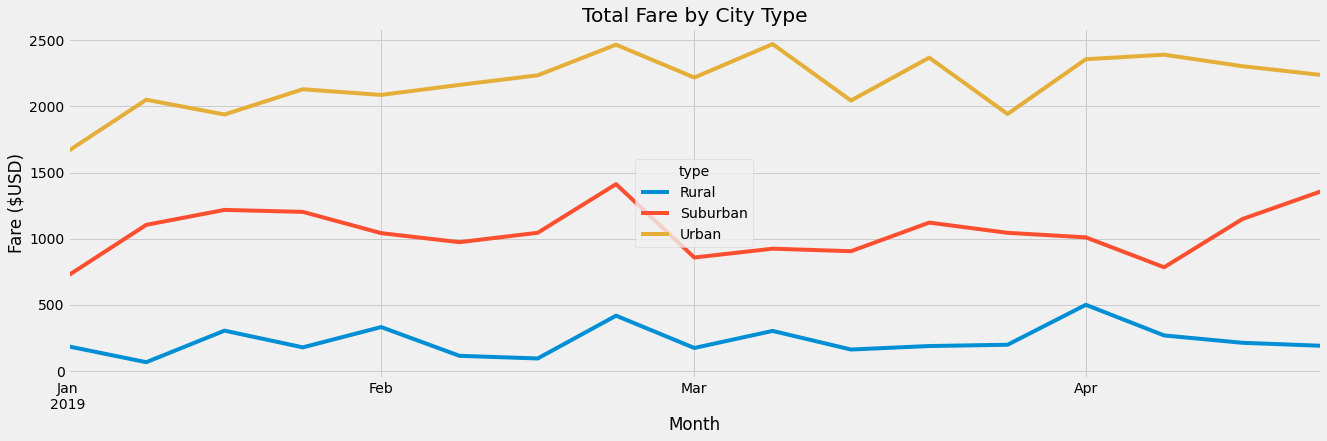

<Figure size 432x288 with 0 Axes>

In [106]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

weekly_fare = weekly_fare_df.plot(figsize = (20,6))
# Add a title 
weekly_fare.set_title("Total Fare by City Type")
#  Add a x- and y-axis label.
weekly_fare.set_xlabel("Month")
weekly_fare.set_ylabel("Fare ($USD)")

plt.show()
plt.tight_layout()